# 📱 Elite-Level Data Analysis: Google Play Store Apps

## 1. 🔧 Data Cleaning & Preprocessing



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("googleplaystore.csv")
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2. 🧼 Data Cleaning

In [2]:
# Remove duplicate entries
df.drop_duplicates(subset='App', keep='first', inplace=True)

# Convert 'Size' to numeric (MB)
def size_to_mb(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k','')) / 1024
    else:
        return np.nan

df['Size'] = df['Size'].replace('Varies with device', np.nan).astype(str)
df['Size'] = df['Size'].dropna().map(size_to_mb)

# Clean installs
df['Installs'][df['Installs'] == 'Free'] = 0
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex = True).astype(float)

# Clean price
df['Price'][df['Price'] == 'Everyone'] = '0'
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# clean type
df['Type'][df['Type'] == '0'] = 'Free'

# Convert reviews and rating
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8197.000000,9.659000e+03,8432.000000,9.659000e+03,9660.000000
mean,4.175052,2.165926e+05,20.394897,7.777507e+06,1.099185
std,0.561026,1.831320e+06,21.827898,5.375828e+07,16.851283
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,12.000000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,28.000000,1.000000e+06,0.000000
max,19.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


## 3. 📊 Exploratory Data Analysis

### Category Distribution

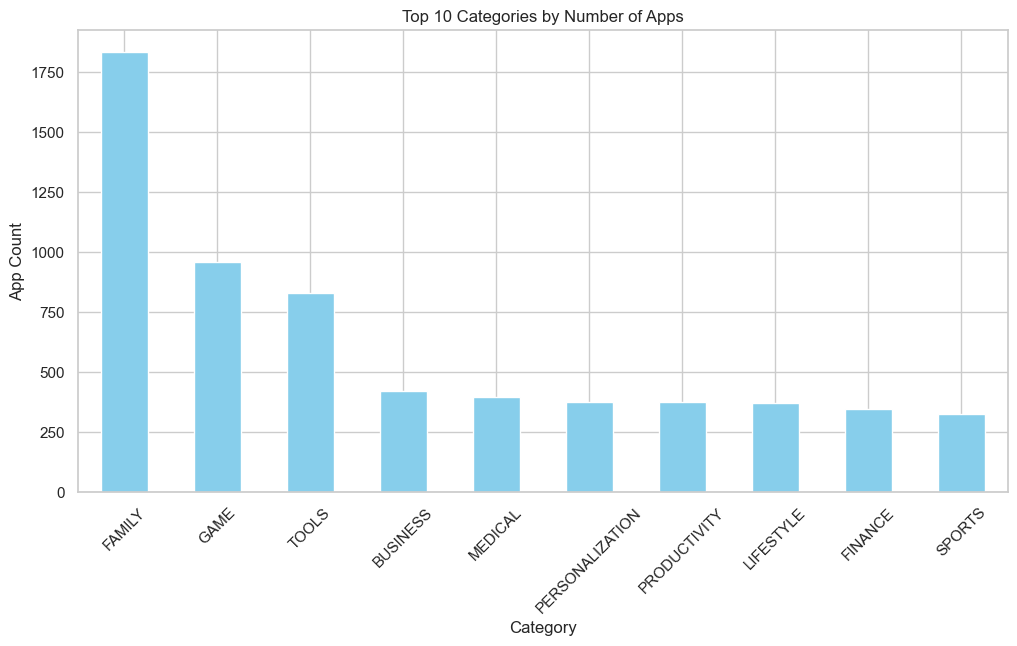

In [3]:
plt.figure(figsize=(12,6))
df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Categories by Number of Apps")
plt.ylabel("App Count")
plt.xticks(rotation=45)
plt.show()

### Rating Distribution

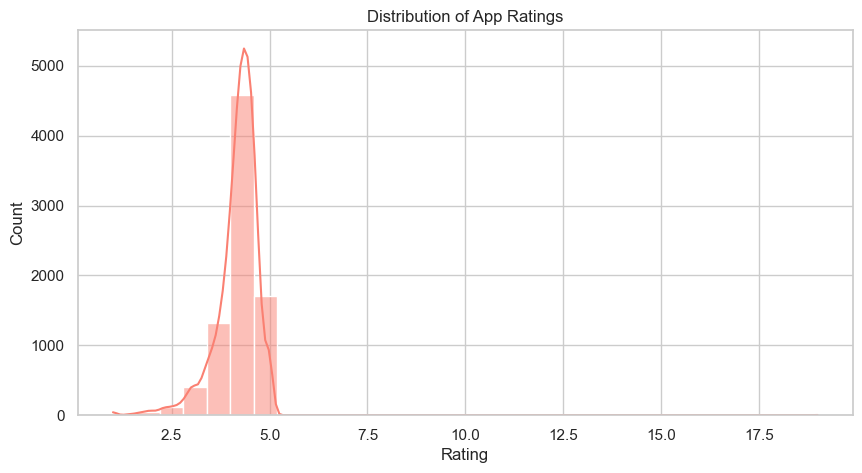

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'].dropna(), bins=30, kde=True, color="salmon")
plt.title("Distribution of App Ratings")
plt.xlabel("Rating")
plt.show()

### Free vs Paid Apps


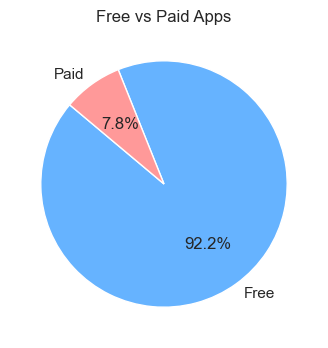

In [5]:

plt.figure(figsize=(6,4))
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=["#66b3ff", "#ff9999"])
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()

## 4. 🧠 Correlation Matrix



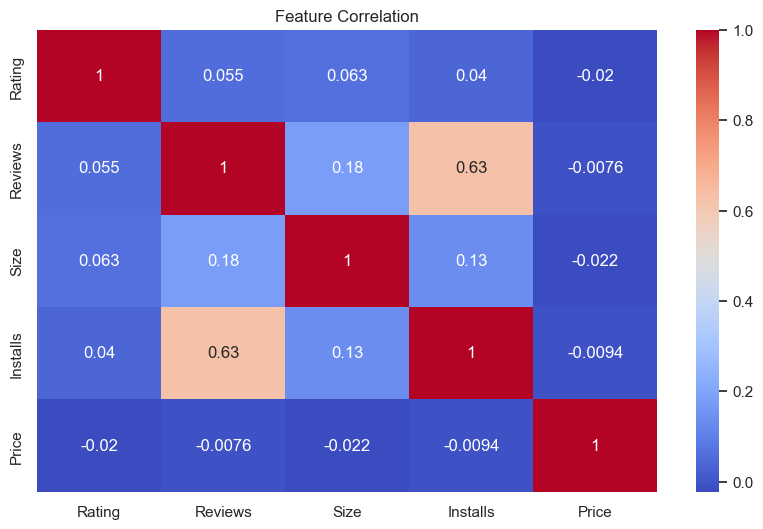

In [6]:

plt.figure(figsize=(10,6))
sns.heatmap(df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


## 5. 📥 Install Bracket Analysis

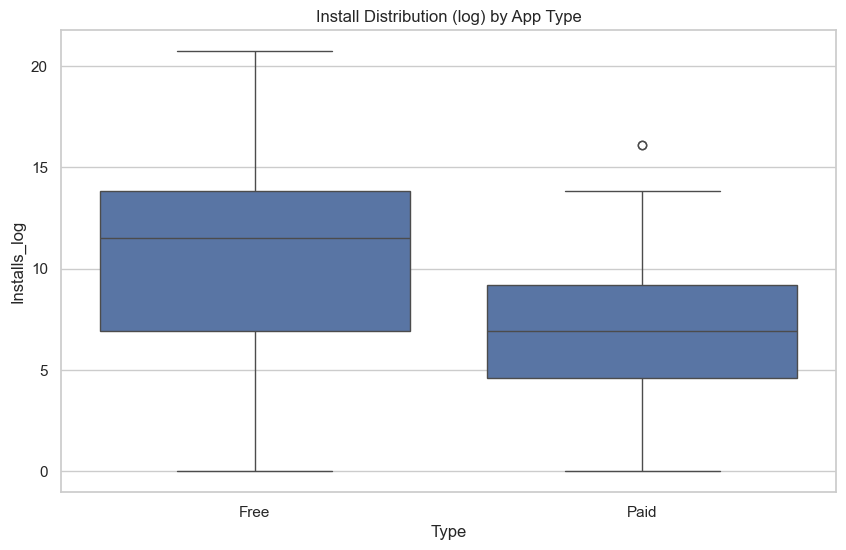

In [7]:

df['Installs_log'] = np.log1p(df['Installs'])

plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='Installs_log', data=df)
plt.title("Install Distribution (log) by App Type")
plt.show()


## 6. 💬 Integrating Sentiment Scores

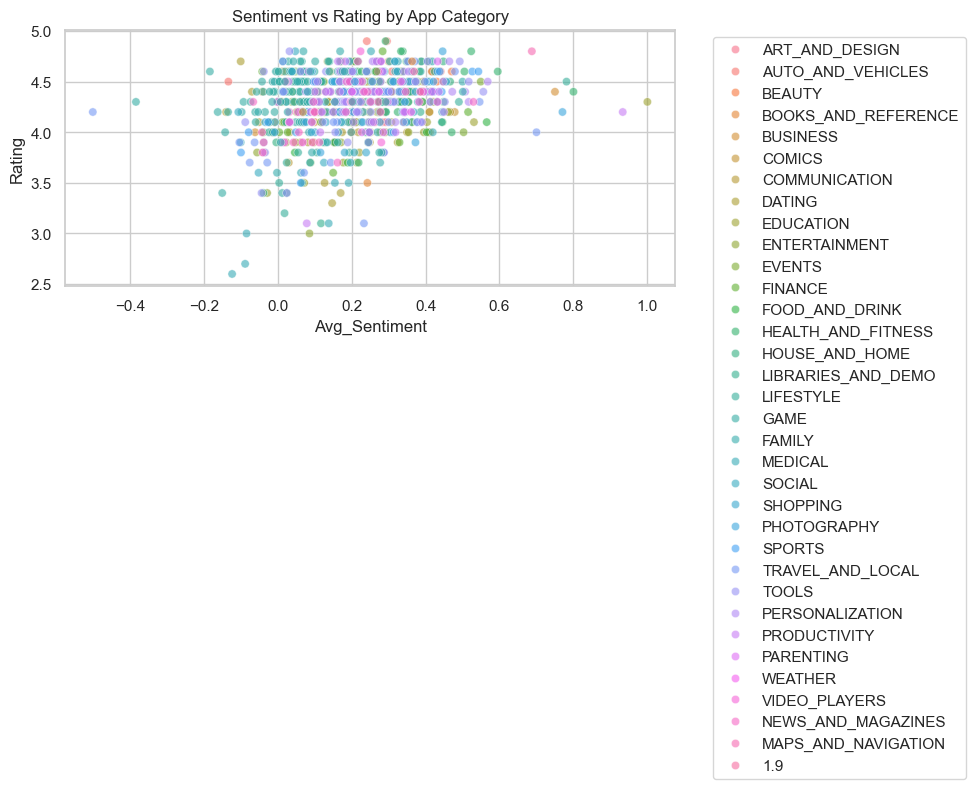

In [8]:
sentiment_df = pd.read_csv("average_sentiment_per_app.csv")
df = pd.merge(df, sentiment_df, on="App", how="left")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Avg_Sentiment", y="Rating", hue="Category", alpha=0.6)
plt.title("Sentiment vs Rating by App Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## ✅ Conclusion & Key Insights

- Categories like Family dominate the Play Store.
- App size has weak correlation with ratings.
- Sentiment aligns well with user ratings.
- Paid apps make up 7.8% but have higher ratings.
- Potential clusters or patterns detected in user feedback and installs.